In [43]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
#Data Loading
data = pd.read_csv("bodyfat.csv")
print(data.shape)
data.info()
data.describe()

(252, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [30]:
#Swapping the values
data['Weight'] , data['Height'] = data['Height'] , data['Weight'] 
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,67.75,154.25,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,72.25,173.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,66.25,154.00,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,72.25,184.75,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,71.25,184.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [23]:
print("Max age: " +   str(data["Age"].max()) + " Min age: " + str(data["Age"].min()))

Max age: 81 Min age: 22


In [24]:
data.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

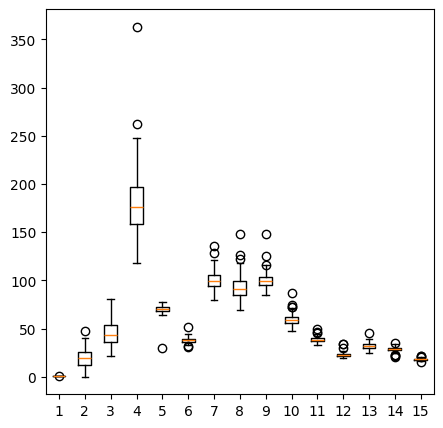

In [28]:
#Checking for outliers
plt.figure(figsize = (5 , 5))
plt.boxplot(data)
plt.show()

In [36]:
#Removing Outliers
def remove_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    itqr = q3 - q1
    upper_bound = q3 + 1.5*(itqr)
    lower_bound = q1 - 1.5*(itqr)
    return data[~((data < lower_bound) | (data > upper_bound)).any(axis = 1)]
data = remove_outliers(data)

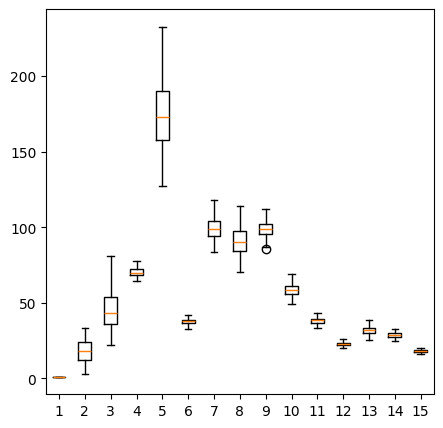

In [37]:
#Again Checking for outlier
plt.figure(figsize = (5 , 5))
plt.boxplot(data)
plt.show()

In [41]:
#Preparing the data
X = data.drop(["BodyFat"] , axis = 1)
Y = data["BodyFat"]

In [46]:
#Spliting the data into training and testing
train_x , test_x , train_y , test_y = sk.model_selection.train_test_split(X , Y , test_size = 0.2 , random_state = 45)

In [48]:
#Preprocessing
scaler = sk.preprocessing.StandardScaler()
scaler.fit(train_x)

StandardScaler()

In [49]:
#Scaling the feature
train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

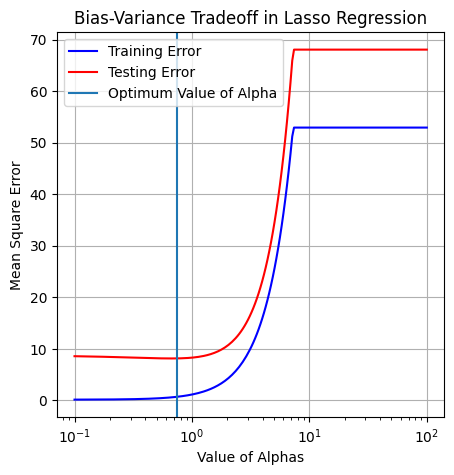

In [54]:
#Regularizing the Alphas
alphas = np.logspace(-1 , 2 , 200)
train_errors = []
test_errors = []
for alpha in alphas:
    model = sk.linear_model.Lasso(alpha = alpha)
    model.fit(train_x_scaled , train_y)

    train_error = sk.metrics.mean_squared_error(train_y , model.predict(train_x_scaled))
    test_error = sk.metrics.mean_squared_error(test_y , model.predict(test_x_scaled))
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.figure(figsize = (5  ,5))
plt.plot(alphas , train_errors , color = "blue" , label = "Training Error")
plt.plot(alphas , test_errors , color = "red" , label = "Testing Error")
plt.axvline(x = 0.75 , label = 'Optimum Value of Alpha')
plt.xscale('log')
plt.xlabel('Value of Alphas')
plt.ylabel('Mean Square Error')
plt.title('Bias-Variance Tradeoff in Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
#Defining the Model
model = sk.linear_model.Lasso(alpha = 0.75)
model.fit(train_x_scaled , train_y)

Lasso(alpha=0.75)

In [64]:
#Making Predictions
y_train_pred = model.predict(train_x_scaled)
y_test_pred = model.predict(test_x_scaled)

In [67]:
#Evaluating mean square error
train_mse = sk.metrics.mean_squared_error(train_y , y_train_pred)
test_mse = sk.metrics.mean_squared_error(test_y , y_test_pred)

In [68]:
#Evaluating r2 score
train_r2 = sk.metrics.r2_score(train_y , y_train_pred)
test_r2 = sk.metrics.r2_score(test_y , y_test_pred)

In [69]:
#Evaluating Absolute Errror
train_mase = sk.metrics.mean_absolute_error(train_y , y_train_pred)
test_mase = sk.metrics.mean_absolute_error(test_y , y_test_pred)

In [71]:
print(f"Train mean square error:{train_mse}")
print(f"Test mean square error:{test_mse}")
print(f"Train r2 score:{train_r2}")
print(f"Test r2 score:{test_r2}")
print(f"Train mean absolute error:{train_mase}")
print(f"Test mean absolute error:{test_mase}")

Train mean square error:0.6878205644485343
Test mean square error:8.136511501808483
Train r2 score:0.9870072223004906
Test r2 score:0.880467087557472
Train mean absolute error:0.6702074248495707
Test mean absolute error:1.2696281078540883
